In [2]:
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
test1 = pd.read_csv('./2016_edition_augmented/mitbih_test.csv')
train1 = pd.read_csv('./2016_edition_augmented/mitbih_train.csv')

In [5]:
test1.head()

,1.000000000000000000e+00,7.582644820213317871e-01,1.115702465176582336e-01,0.000000000000000000e+00,8.057851344347000122e-02,7.851240038871765137e-02,6.611569970846176147e-02,4.958677664399147034e-02,4.752065986394882202e-02,3.512396663427352905e-02,...,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
0,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.923664,0.656489,0.195929,0.111959,0.175573,0.122137,0.050891,0.035623,0.055980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#PCA
#marine predators
#convergence curve
#objective functions----single / multi 

In [7]:
for trains in train1:
    train1.columns = list(range(len(train1.columns)))
    
for tests in test1:
    test1.columns = list(range(len(test1.columns)))

In [8]:
test1.sample()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
13132,0.934694,0.836735,0.404082,0.126531,0.118367,0.106122,0.085714,0.053061,0.061224,0.053061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
train1.sample()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
67909,0.982079,0.663082,0.100358,0.103943,0.197133,0.172043,0.150538,0.154122,0.132616,0.132616,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#combining two data into one
dataset1 = pd.concat([train1, test1], axis=0).sample(frac=1.0, random_state =0).reset_index(drop=True)

In [11]:
dataset1.sample()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
92263,0.960825,0.995876,0.501031,0.206186,0.148454,0.107216,0.094845,0.090722,0.173196,0.346392,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
dataset1.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,109444.000000,109444.000000,109444.000000,109444.000000,109444.000000,109444.000000,109444.000000,109444.000000,109444.000000,109444.000000,...,109444.000000,109444.000000,109444.000000,109444.000000,109444.000000,109444.000000,109444.000000,109444.000000,109444.000000,109444.000000
mean,0.891168,0.758907,0.424504,0.219604,0.201238,0.210299,0.205609,0.201619,0.198482,0.196613,...,0.004937,0.004568,0.004237,0.003914,0.003673,0.003469,0.003210,0.002956,0.002835,0.473448
std,0.239659,0.221191,0.227559,0.207248,0.177192,0.171966,0.178375,0.177021,0.171469,0.168028,...,0.043952,0.042109,0.040471,0.038801,0.037465,0.036552,0.035015,0.033414,0.032620,1.143240
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.922251,0.682642,0.251018,0.048858,0.082418,0.088300,0.073171,0.066097,0.064897,0.068627,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991202,0.826560,0.430174,0.166355,0.147842,0.158640,0.145078,0.144465,0.150078,0.148853,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910865,0.579832,0.342714,0.259049,0.287505,0.298343,0.295238,0.290625,0.283465,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [13]:
dataset1.shape

(109444, 188)

<Axes: ylabel='Count'>

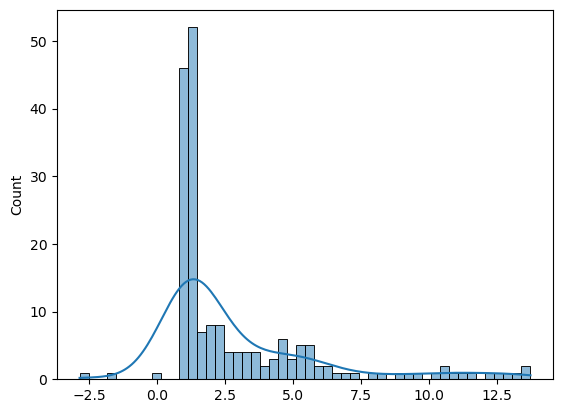

In [14]:
#skewness of the dataset
#the deviation of the distribution of the data from a normal distribution
#+ve mean > median > mode
#-ve mean < median < mode
import seaborn as sns
sns.histplot(dataset1.skew(), bins = 50, kde = True)

<Axes: ylabel='Count'>

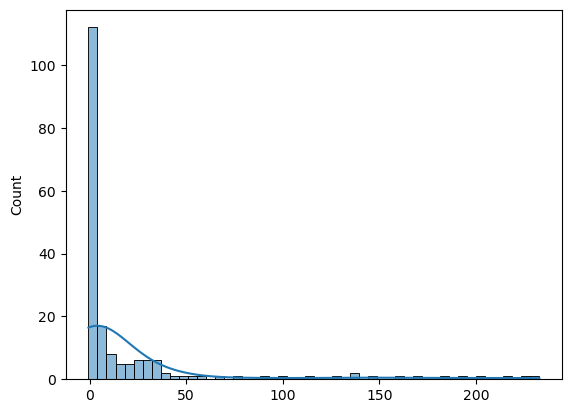

In [15]:
#kurtosis of dataset
#identifies whether the tails of a given distribution contain extreme values
#Leptokurtic indicates a positive excess kurtosis
#mesokurtic distribution shows an excess kurtosis of zero or close to zero
#platykurtic distribution shows a negative excess kurtosis
sns.histplot(dataset1.kurtosis(), bins = 50, kde = True)

In [16]:
#splitting dataset to dependent and independent variable
X = dataset1.iloc[:,:-1].values #independent values / features
y = dataset1.iloc[:,-1].values #dependent values / target

In [17]:
print("shape of X(independent variables):",X.shape)
print("shape of y(dependent variables):", y.shape)

shape of X(independent variables): (109444, 187)
shape of y(dependent variables): (109444,)


In [18]:
count0 = 0
count1 = 0
count2 = 0
count3 = 0
count4 = 0
for i in range(0, len(y)):
    if(y[i]==0):
        count0=count0+1
    elif(y[i]==1):
        count1=count1+1
    elif(y[i]==2):
        count2=count2+1
    elif(y[i]==3):
        count3=count3+1
    else:
        count4=count4+1

In [19]:
print("0:",count0,"\t1:",count1,"\t2:",count2,"\t3:",count3,"\t4:",count4)

0: 90587 	1: 2779 	2: 7236 	3: 803 	4: 8039


In [22]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
pt = PowerTransformer()
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
oversample = SMOTE()
dataset1_cols = dataset1.columns
dataset1_cols=np.linspace(dataset1_cols,dataset1_cols[-1])
for i in dataset1_cols[0:1]:
        array = np.array(dataset1[i]).reshape(-1, 1)
        #arrayX = np.array(X[:,:1]).reshape(-1, 1)
        #arrayY = np.array(encoded).reshape(1, -1)
        _y = pt.fit_transform(array)
        _x = qt.fit_transform(array)
X_, y_ = oversample.fit_resample(_x, _y)

In [45]:
from collections import Counter
counter_before = Counter(y)
print(counter_before)##clusters of data in BIH dataset

Counter({0.0: 90587, 4.0: 8039, 2.0: 7236, 1.0: 2779, 3.0: 803})


In [57]:
#applying SMOTE for imbalance
from imblearn.over_sampling import SMOTE
oversample = SMOTE()#random_state=42)

In [56]:
'''X, y = oversample.fit_resample(X, y)
counter = Counter(y)
print(counter)'''

'X, y = oversample.fit_resample(X, y)\ncounter = Counter(y)\nprint(counter)'

In [59]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=42)

In [60]:
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [61]:
print("X Train shape: ", X_train.shape)
print("X Test shape: ", X_test.shape)

X Train shape:  (76610, 187, 1)
X Test shape:  (32834, 187, 1)


In [62]:
cnn_model = tf.keras.models.Sequential()
cnn_model.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001), input_shape = (X_train.shape[1],1)))
cnn_model.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
cnn_model.add(Conv1D(filters=128, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
##END OF FIRST BLOCK OF CNNS
cnn_model.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
cnn_model.add(Dropout(0.5))
##MAXPOOL + DROPOUT FOR REGULARISATION

In [64]:
cnn_model.add(Flatten())
#Add a dense layer with 256 neurons
cnn_model.add(Dense(units = 256, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Add a dense layer with 512 neurons###LEAKY RELU
cnn_model.add(Dense(units = 512, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Softmax as last layer with five outputs
cnn_model.add(Dense(units = 5, activation='softmax'))

In [65]:
cnn_model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [66]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 187, 32)           128       
                                                                 
 conv1d_1 (Conv1D)           (None, 187, 64)           6208      
                                                                 
 conv1d_2 (Conv1D)           (None, 187, 128)          24704     
                                                                 
 max_pooling1d (MaxPooling1  (None, 94, 128)           0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 94, 128)           0         
                                                                 
 flatten (Flatten)           (None, 12032)             0         
                                                        

In [67]:
cnn_model_history = cnn_model.fit(X_train, y_train, epochs=10, batch_size = 10, validation_data = (X_test, y_test))

Epoch 1/10
7661/7661 [==============================] - 748s 96ms/step - loss: 0.1730 - accuracy: 0.9543 - val_loss: 0.1109 - val_accuracy: 0.9702
Epoch 2/10
7661/7661 [==============================] - 711s 93ms/step - loss: 0.1068 - accuracy: 0.9712 - val_loss: 0.0966 - val_accuracy: 0.9743
Epoch 3/10
7661/7661 [==============================] - 660s 86ms/step - loss: 0.0877 - accuracy: 0.9756 - val_loss: 0.0804 - val_accuracy: 0.9783
Epoch 4/10
7661/7661 [==============================] - 665s 87ms/step - loss: 0.0784 - accuracy: 0.9780 - val_loss: 0.0787 - val_accuracy: 0.9793
Epoch 5/10
7661/7661 [==============================] - 685s 89ms/step - loss: 0.0747 - accuracy: 0.9794 - val_loss: 0.0796 - val_accuracy: 0.9805
Epoch 6/10
7661/7661 [==============================] - 648s 85ms/step - loss: 0.0698 - accuracy: 0.9813 - val_loss: 0.0810 - val_accuracy: 0.9788
Epoch 7/10
7661/7661 [==============================] - 663s 87ms/step - loss: 0.0673 - accuracy: 0.9815 - val_loss: 0

Text(0, 0.5, 'Accuracy')

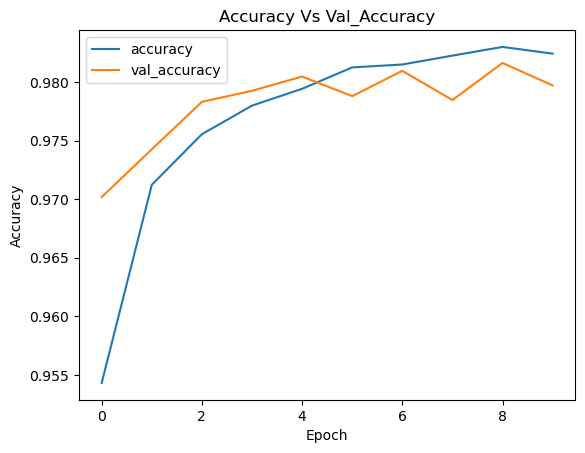

In [68]:
#cnn_model_history.keys
plt.plot(cnn_model_history.history['accuracy'])
plt.plot(cnn_model_history.history['val_accuracy'])
plt.legend(["accuracy","val_accuracy"])
plt.title('Accuracy Vs Val_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

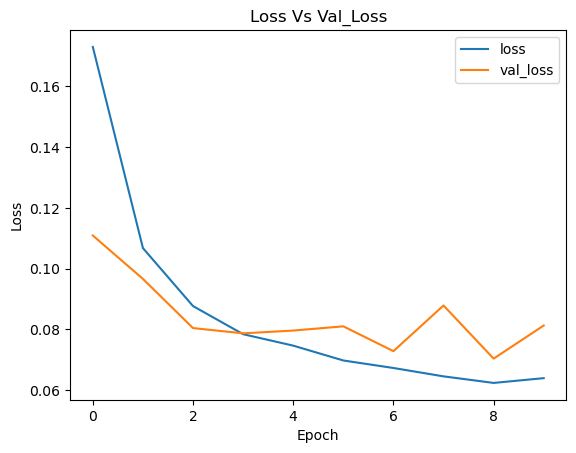

In [69]:
plt.plot(cnn_model_history.history['loss'])
plt.plot(cnn_model_history.history['val_loss'])
plt.legend(["loss","val_loss"])
plt.title('Loss Vs Val_Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')